In [1]:
'''
First, define the environment. In this example, we are only using price data to initialize our state space
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    instrument = "EUR_USD", 
    granularity = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

c:\users\sakiyama\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Can not use swisseph package!


In [2]:
'''
The Learning Agent -> DQN

Adjust hyperparameters and other model settings:
-> ./settings/DQNsettings
'''

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\pleiades\xampp\htdocs\TradingTensors\data'

agent = DQNAgent(
    env= env,
    directory = PATH, #Path to save your models
)

# Train/Test Mode

<img src='./images/AgentEnv.JPG'/>

In [3]:
'''
Two things are happening under the hood to improve the stability of DQN:
- Experience Replay: Sampling transition tuples (s, a, r, s') with equal probability during SGD. Experiences can be reused
- Target Network: Freeze the Online Network to improve bootstrapping of TD-Target
'''

agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    train_episodes = 200
)

End of Episode 1, Total Reward is -227.9, Average Reward is -2.650
Percentage of time spent on exploring (Random Action): 96 %
End of Episode 2, Total Reward is -109.9, Average Reward is -1.263
Percentage of time spent on exploring (Random Action): 93 %
End of Episode 3, Total Reward is -99.1, Average Reward is -1.152
Percentage of time spent on exploring (Random Action): 90 %
End of Episode 4, Total Reward is 290.1, Average Reward is 3.413
Percentage of time spent on exploring (Random Action): 86 %
End of Episode 5, Total Reward is 90.2, Average Reward is 1.013
Percentage of time spent on exploring (Random Action): 83 %
End of Episode 6, Total Reward is 100.3, Average Reward is 1.153
Percentage of time spent on exploring (Random Action): 80 %
End of Episode 7, Total Reward is -40.3, Average Reward is -0.458
Percentage of time spent on exploring (Random Action): 76 %
End of Episode 8, Total Reward is -12.2, Average Reward is -0.137
Percentage of time spent on exploring (Random Action):

End of Episode 49, Total Reward is -93.9, Average Reward is -0.988
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 50, Total Reward is -16.6, Average Reward is -0.175
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode50.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 51, Total Reward is 48.9, Average Reward is 0.520
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode51.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 52, Total Reward is -46.1, Average Reward is -0.518
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 53, Total Reward is -99.0, Average Reward is -1.076
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 54, Total Reward is 149.7, Average Reward is 1.610
Percentage of time spent on 

End of Episode 94, Total Reward is 197.5, Average Reward is 2.124
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode94.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 95, Total Reward is -119.3, Average Reward is -1.283
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 96, Total Reward is 241.6, Average Reward is 2.598
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode96.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 97, Total Reward is 149.7, Average Reward is 1.663
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode97.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 98, Total Reward is -39.9, Average Reward is -0.434
Percentage of 

End of Episode 154, Total Reward is 4.30000000001, Average Reward is 0.046
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 155, Total Reward is -88.6, Average Reward is -0.923
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 156, Total Reward is -31.0, Average Reward is -0.330
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 157, Total Reward is -139.8, Average Reward is -1.472
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 158, Total Reward is 89.8, Average Reward is 0.998
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 159, Total Reward is -95.6, Average Reward is -1.039
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 160, Total Reward is 61.5, Average Reward is 0.676
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 161, Total Reward is 172.0, Average Reward is 1.911
Percentage of time spent on exploring (R

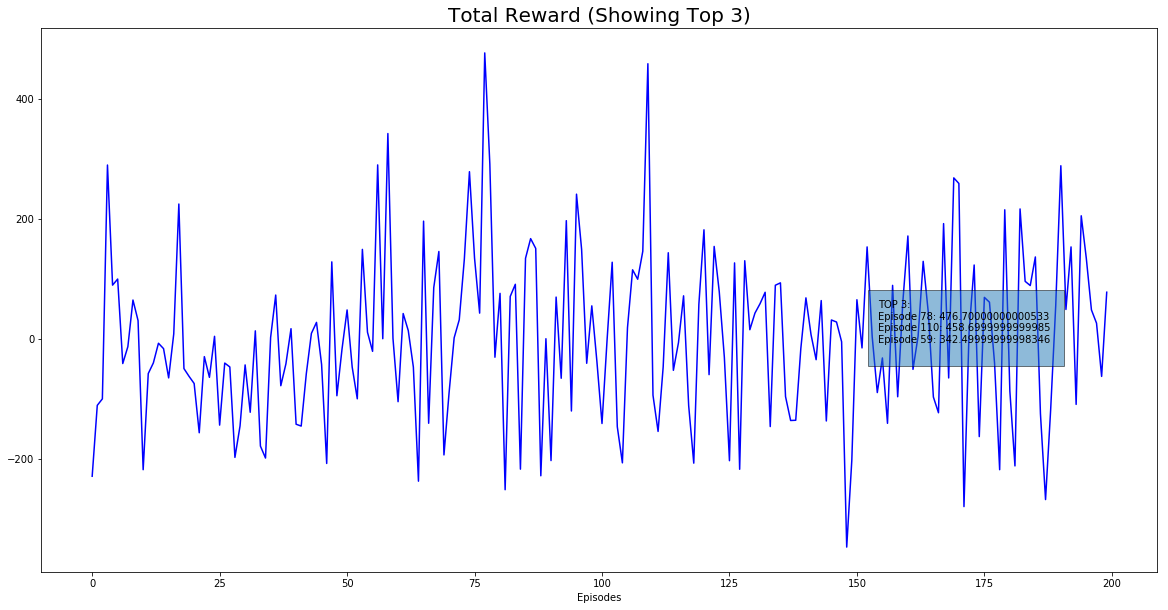

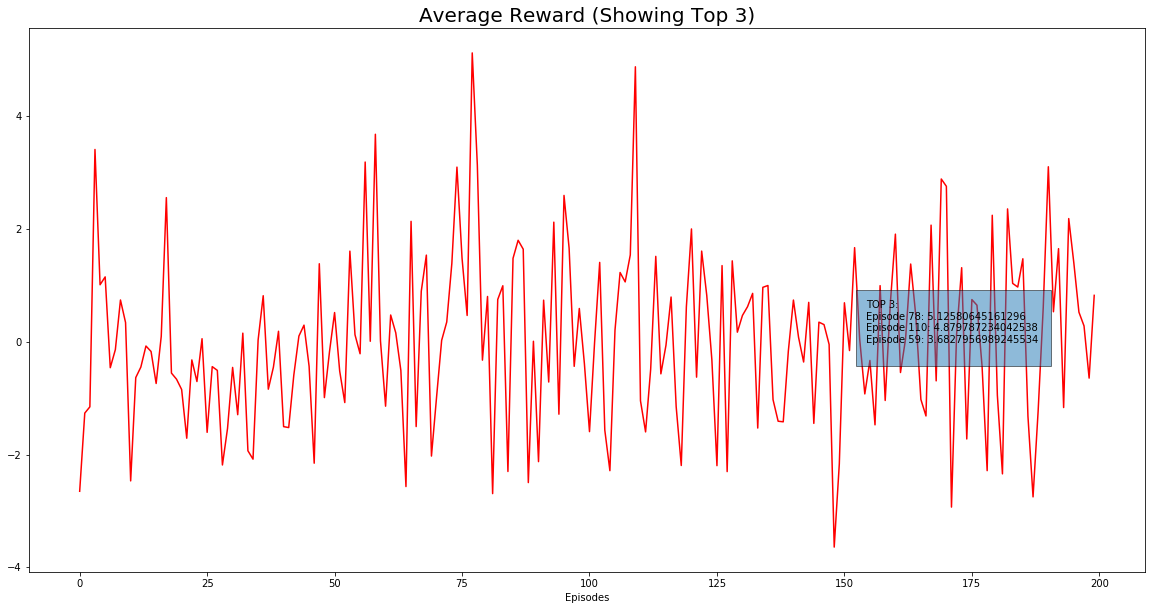

########   RANK 1   ###########
Episode          | 78
Total Reward     | 476.70
Average Reward   | 5.13
########   RANK 2   ###########
Episode          | 110
Total Reward     | 458.70
Average Reward   | 4.88
########   RANK 3   ###########
Episode          | 59
Total Reward     | 342.50
Average Reward   | 3.68
########   RANK 4   ###########
Episode          | 57
Total Reward     | 290.30
Average Reward   | 3.19
########   RANK 5   ###########
Episode          | 79
Total Reward     | 291.60
Average Reward   | 3.14
########   RANK 6   ###########
Episode          | 191
Total Reward     | 288.90
Average Reward   | 3.11
########   RANK 7   ###########
Episode          | 75
Total Reward     | 279.00
Average Reward   | 3.10
########   RANK 8   ###########
Episode          | 170
Total Reward     | 268.70
Average Reward   | 2.89
########   RANK 9   ###########
Episode          | 171
Total Reward     | 259.40
Average Reward   | 2.76
########   RANK 10   ###########
Episode          | 96
Total

In [4]:
agent.trainSummary()

Summary Statistics for Episode 78 

Total Trades            | 93        (Buy)37       (Sell)56 
Profit (in pips)        | 476.70   (Buy)239.90   (Sell)236.80
Win Ratio               | 63.44%    (Buy)67.57%   (Sell)60.71 %
Average Trade Duration  | 2.98


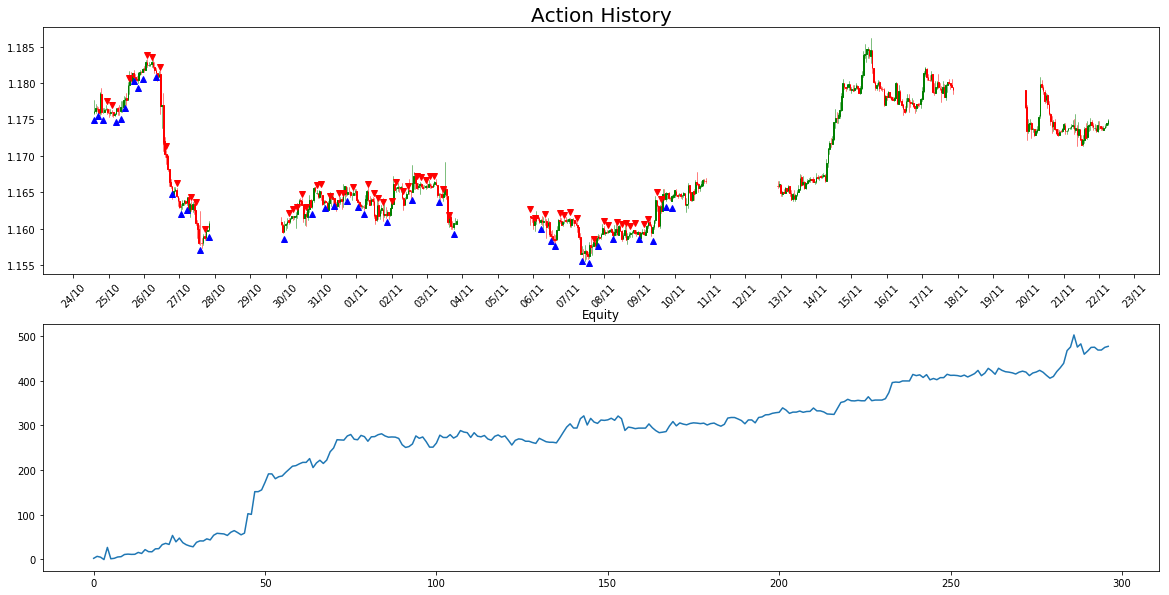

In [7]:
'''Pick a model from a particular episode and test the model on unseen data'''
BEST_EPISODE = 78
agent.episodeReview(BEST_EPISODE)

INFO:tensorflow:Restoring parameters from C:\pleiades\xampp\htdocs\TradingTensors\data\1517_Episode78.ckpt
Summary Statistics for Episode 0 

Total Trades            | 98        (Buy)55       (Sell)43 
Profit (in pips)        | 93.80   (Buy)-10.60   (Sell)104.40
Win Ratio               | 52.04%    (Buy)49.09%   (Sell)55.81 %
Average Trade Duration  | 3.00


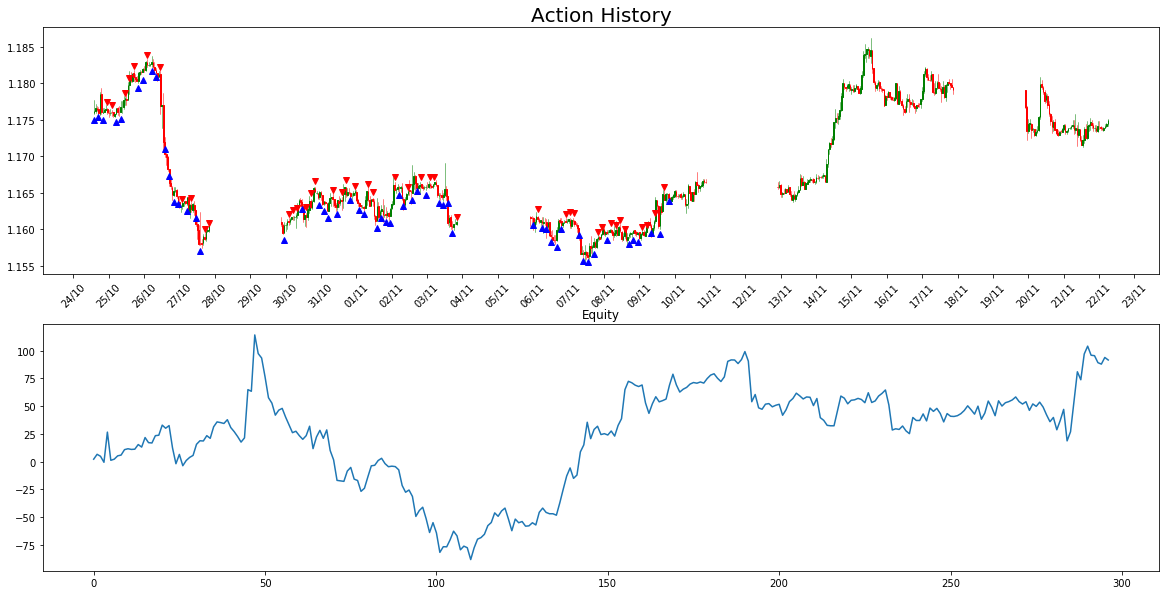

In [8]:
agent.test(BEST_EPISODE)

# Live Trading

When you feel ready, pick this model and go live!

In [ ]:
'''
Under the hood:
2 threads running, one to 'listen' to new candle events, and another to process the new candle and execute trade
Note: Normalize new data set with train_set mean and std


agent.liveTrading(
    MODEL_EPS = 45 #Select the Model # (Training episode)
)
'''

In [ ]:
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "EUR_USD", 
    TIMEFRAME = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\github\MODELS'

agent = DQNAgent(
    env= env,
    PARENT_PATH = PATH, #Path to save your models
    hidden_layers=[128, 64, 32]
)
agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    train_episodes = 200
)

agent.trainSummary()
'''